<a href="https://colab.research.google.com/github/sid-chaubs/data-mining-assignment-1/blob/main/DMT_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/datadrive')

Drive already mounted at /content/datadrive; to attempt to forcibly remount, call drive.mount("/content/datadrive", force_remount=True).


In [2]:
!mkdir /content/training_data
!mkdir /content/test_data
!unzip -o /content/datadrive/MyDrive/training_set_VU_DM.csv.zip -d /content/training_data/
!unzip -o /content/datadrive/MyDrive/test_set_VU_DM.csv.zip -d /content/test_data/

mkdir: cannot create directory ‘/content/training_data’: File exists
mkdir: cannot create directory ‘/content/test_data’: File exists
Archive:  /content/datadrive/MyDrive/training_set_VU_DM.csv.zip
  inflating: /content/training_data/training_set_VU_DM.csv  
Archive:  /content/datadrive/MyDrive/test_set_VU_DM.csv.zip
  inflating: /content/test_data/test_set_VU_DM.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

|Column Name|Data Type|Description|
|-----------|---------|-----------|
|srch_id|Integer|The ID of the search|
|date_time|Date/time|Date and time of the search|
|site_id|Integer|ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ..)|
|visitor_location_country_id |Integer|The ID of the country the customer is located|
|visitor_hist_starrating |Float|The mean star rating of hotels the customer has previously purchased; null signifies there is no purchase history on the customer|
|visitor_hist_adr_usd|Float|The mean price per night (in US$) of the hotels the customer has previously purchased; null signifies there is no purchase history on the customer|
|prop_country_id|Integer|The ID of the country the hotel is located in|
|prop_id|Integer|The ID of the hotel|
|prop_starrating|Integer|The star rating of the hotel, from 1 to 5, in increments of 1.  A 0 indicates the property has no stars, the star rating is not known or cannot be publicized.|
|prop_review_score|Float|The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments. A 0 means there have been no reviews, null that the information is not available.|
|prop_brand_bool|Integer|+1 if the hotel is part of a major hotel chain; 0 if it is an independent hotel|
|prop_location_score1|Float|A (first) score outlining the desirability of a hotel’s location|
|prop_location_score2|Float|A (second) score outlining the desirability of the hotel’s location|
|prop_log_historical_price position|Float   Integer|The logarithm of the mean price of the hotel over the last trading period. A 0 will occur if the hotel was not sold in that period. Hotel position on Expedia's search results page. This is only provided for the training data, but not the test data.|
|price_usd|Float|Displayed price of the hotel for the given search.  Note that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay|
|promotion_flag|Integer|+1 if the hotel had a sale price promotion specifically displayed|
|gross_booking_usd     srch_destination_id |Float     Integer|Total value of the transaction.  This can differ from the price_usd due to taxes, fees, conventions on multiple day bookings and purchase of a room type other than the one shown in the search ID of the destination where the hotel search was performed|
|srch_length_of_stay|Integer|Number of nights stay that was searched|
|srch_booking_window|Integer|Number of days in the future the hotel stay started from the search date|
|srch_adults_count|Integer|The number of adults specified in the hotel room|
|srch_children_count|Integer|The number of (extra occupancy) children specified in the hotel room|
|srch_room_count|Integer|Number of hotel rooms specified in the search|
|srch_saturday_night_bool|Boolean|+1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0|
|srch_query_affinity_score|Float|The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)|
|orig_destination_distance|Float|Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.|
|random_bool|Boolean|+1 when the displayed sort was random, 0 when the normal sort order was displayed|
| | | |
|comp1_rate|Integer|+1 if Expedia has a lower price than competitor 1 for the hotel; 0 if the same; -1 if Expedia’s price is higher than competitor 1; null signifies there is no competitive data|
|comp1_inv |Integer|+1 if competitor 1 does not have availability in the hotel; 0 if both Expedia and competitor 1 have availability; null signifies there is no competitive data|
|comp1_rate_percent_diff|Float|The absolute percentage difference (if one exists) between Expedia and competitor 1’s price (Expedia’s price the denominator); null signifies there is no competitive data|
|comp2_rate| | |
|comp2_inv| |(same, for competitor 2 through 8)|


In [5]:
train_data = pd.read_csv('/content/training_data/training_set_VU_DM.csv')
test_data = pd.read_csv('/content/test_data/test_set_VU_DM.csv')

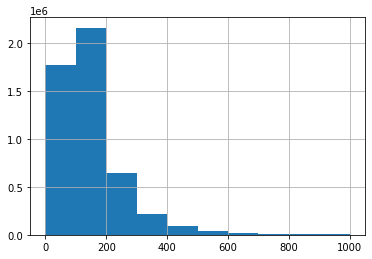

In [21]:
train_data[train_data['price_usd'] < 1000]['price_usd'].hist()